In [1]:
#imports and paths
import os
import json
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from torchvision import transforms
from torchvision.transforms.functional import to_tensor


In [3]:

# Load COCO annotations

DATA_ROOT = "../data/raw"

TRAIN_JSON = os.path.join(DATA_ROOT, "train", "annotations.json")
TRAIN_IMG_DIR = os.path.join(DATA_ROOT, "train", "images")

with open(TRAIN_JSON, "r") as f:
    train_data = json.load(f)

print("Loaded train annotations:", len(train_data["images"]))


Loaded train annotations: 2816


In [4]:

# Runtime augmentation pipeline, executed every time an image loads during training

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.02
    ),
    
    transforms.RandomApply([
        transforms.GaussianBlur(kernel_size=3)
    ], p=0.2),
    
    transforms.RandomApply([
        transforms.RandomRotation(degrees=3)  # small to preserve bounding boxes
    ], p=0.3),

    transforms.ToTensor(),  # Convert to HxWxC → CxHxW
])


Original image: 000001.jpg


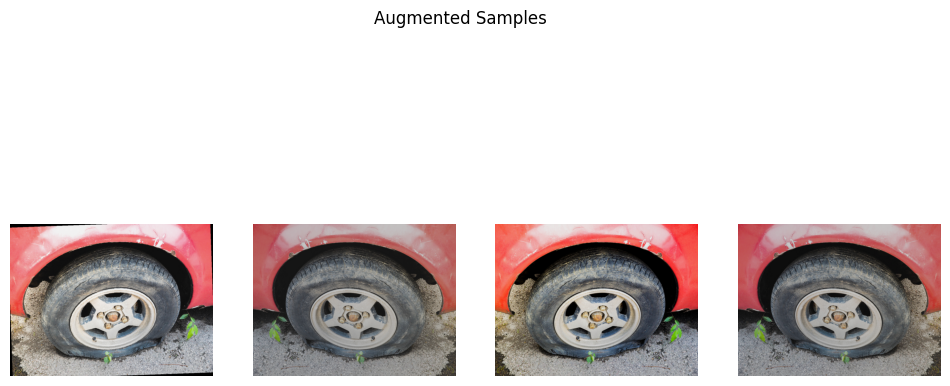

In [5]:
# Visualize augmentation output


def load_image(idx):
    """Load image by index from COCO format."""
    img_info = train_data["images"][idx]
    img_path = os.path.join(TRAIN_IMG_DIR, img_info["file_name"])
    return Image.open(img_path).convert("RGB"), img_info["file_name"]

def show_augmentations(index, num_samples=4):
    """Show multiple augmented versions of a single image."""
    img, file_name = load_image(index)
    
    print("Original image:", file_name)
    
    plt.figure(figsize=(12, 6))
    plt.suptitle("Augmented Samples")

    for i in range(num_samples):
        aug_img = train_transforms(img)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(aug_img.permute(1, 2, 0))  # convert back to HWC
        plt.axis("off")

    plt.show()

# Example: visualize augmentations for image index 0
show_augmentations(0, num_samples=4)


In [6]:
import cv2
import matplotlib.pyplot as plt

def visualize_augmented_with_boxes(image, bboxes, category_ids):
    img = image.copy()
    for box, cat in zip(bboxes, category_ids):
        x_min, y_min, w, h = map(int, box)
        cv2.rectangle(img, (x_min, y_min), (x_min+w, y_min+h), (255,0,0), 2)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
